### Математика и Python для анализа данных  
Центральная предельная теорема своими руками  
https://www.coursera.org/learn/mathematics-and-python/peer/4vN1n/tsientral-naia-priediel-naia-tieoriema-svoimi-rukami  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
from scipy.stats import norm, expon
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [2]:
# https://en.wikipedia.org/wiki/Exponential_distribution
lambd = 2 # интенсивность (обратный коэффициент масштаба)
mean = lambd ** -1 # теоретические среднее (мат. ожидание) нашего распределения
disp = lambd ** -2 # теоретическая дисперсия нашего распределения
exp_rv = expon(loc=0, scale=1/lambd) # случайная величина (экспоненциальное распределение)
x = np.linspace(0, 3, 1000) # 1000 значений от 0 до 3 с равным шагом
sample = exp_rv.rvs(1000) # выборка из 1000 значений из нашего распределения
cdf = exp_rv.cdf(x) # теоретическая функция распределения
pdf = exp_rv.pdf(x) # функция плотности вероятности
ecdf = ECDF(sample) # эмпирическая функция распределения

##### Построим теоретическую и эмпирическую функции распределения

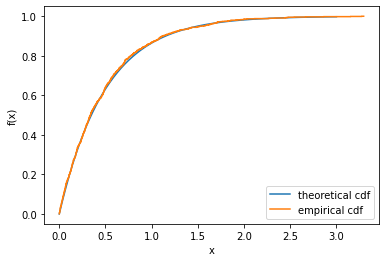

In [3]:
pp.plot(x, cdf, label='theoretical cdf')
pp.step(ecdf.x, ecdf.y, label = 'empirical cdf')
pp.ylabel('f(x)')
pp.xlabel('x')
pp.legend();

Эмпирическая функция довольно близка к теоретической (большой объём выборки)

##### Построим гистограмму выборки и график теоретической функции плотности распределения нашей случайной величины

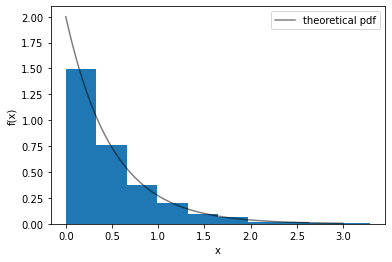

In [4]:
pp.hist(sample, density=True)
pp.plot(x, pdf, label='theoretical pdf', alpha=0.5, color='black')
pp.ylabel('f(x)')
pp.xlabel('x')
pp.legend();

##### Применение центральной предельной теоремы
Для каждого значения n - объёма выборки (2, 5, 10, 20, 30, 50) - генерировать 1000 выборок объёма n, для каждой считать выборочное среднее и строить гистограммы распределений выборочных средних для каждого n, а поверх гистограмм строить графики плотности вероятности для нормальных распределений, которые аппроксимируют (приближает) выборочные средние при различных n по ЦПТ

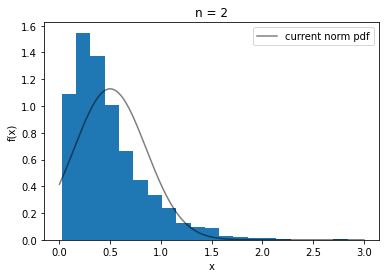

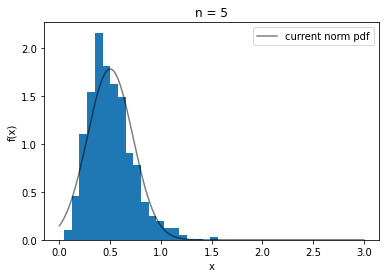

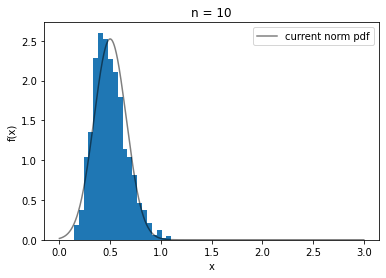

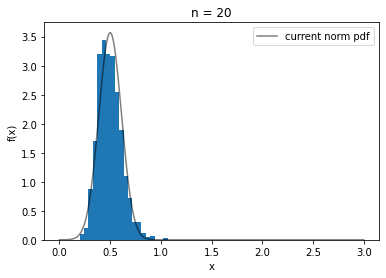

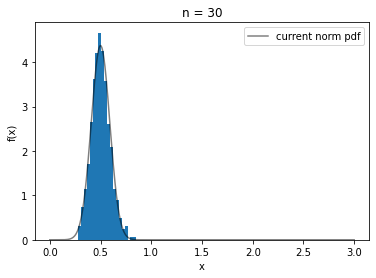

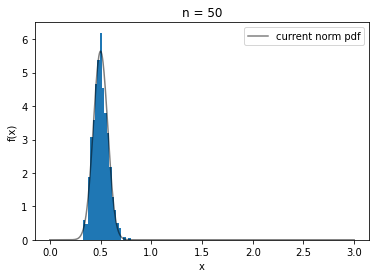

In [5]:
for n in [2, 5, 10, 20, 30, 50]: # n: размер выборки
    means = [(sum(exp_rv.rvs(n)) / n) for _ in range(1000)] # 1000 выборок (средние)
    norm_rv = norm(mean, np.sqrt(disp / n)) # нормальное распределения (по ЦПТ)
    pdf = norm_rv.pdf(x) # функция плотности вероятности
    pp.hist(means, bins=20, density=True) # гистограма средних
    pp.plot(x, pdf, label='current norm pdf', alpha=0.5, color='black')
    pp.title(f'n = {n}')
    pp.ylabel('f(x)')
    pp.xlabel('x')
    pp.legend()
    pp.show()

С ростом размера выборки точность нормальной аппроксимации увеличивается